
# Prerequisities

- Reading Notebooks of Dimensionality Reduction
  - Dimensionality Reduction and Singular Value Decomposition (SVD)
  - Principal Component Analysis (PCA)

# **Kernel PCA for Non-Linear Data**

**[TOTAL POINTS: 10]**

## **Motivation**

In this assignment, you will reduce the linear data dimension using classical PCA and use Kernel PCA to reduce the dimension of non linearly separable data. Let's get started.

## **Learning Objective**

By the end of this assignment, a student should be able to

- Reduce the dimension of the linear and non-linear dataset with the help of principal components.

- Plot PCA transformed data, and Kernel PCA transformed data.



# Imports

First, let us import the global packages that we need throughout the assignment. 

In [44]:
## Imports
import numpy as np
import matplotlib.pyplot as plt

# PCA with Linear Data

Before diving deep into non-linear data, let us revisit the linear data and implementation of PCA on linear data. Principal Component is a dimensionality reduction technique that can also be widely used for visualization, noise filtering, feature extraction engineering, and so on. 

First, we will see how PCA reduces the dimension of linear data from two dimensions to one dimension.

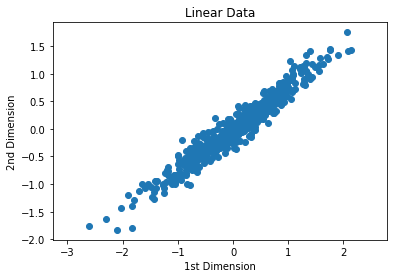

In [45]:
## Generate synthetic linear data
seed = np.random.RandomState(12)
X = np.dot(seed.rand(2, 2), seed.randn(2, 500)).T
plt.scatter(X[:, 0], X[:, 1])
plt.title("Linear Data")
plt.xlabel("1st Dimension")
plt.ylabel("2nd Dimension")
plt.axis('equal');

This is an example of linear data. Using Scikit-Learn's PCA estimator, we can compute the principal components as:

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Now, we will extract eigenvectors from the PCA function fitted on the data, X. Furthermore, we will plot the principal components on the original data.

In [47]:
eig_vectors = pca.components_
eig_vec1 = eig_vectors[0]
eig_vec2 = eig_vectors[1]

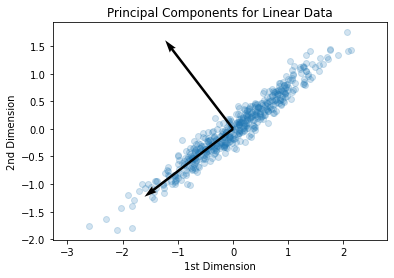

In [48]:
# # plot data
origin =[0,0]
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

plt.quiver(*origin, *eig_vec1, scale=3)
plt.quiver(*origin, *eig_vec2, scale=3)

plt.title("Principal Components for Linear Data")
plt.xlabel("1st Dimension")
plt.ylabel("2nd Dimension")
plt.axis('equal');

The arrows in the graph are the two principal components. The principal components are orthogonal to each other. The direction of the principal components denotes the direction of the highest variance.

## Dimensionality Reduction with PCA

Now that we have found the direction of the highest variance in the dataset through the principal components. Dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [49]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (500, 2)
transformed shape: (500, 1)


The transformed data is now reduced to a single dimension from two-dimension. With this, the data to be stored is reduced. Now, we will reconstruct the dataset with this reduced dimension. Let us see how the reduction in dimension effects in restoring the original dataset.

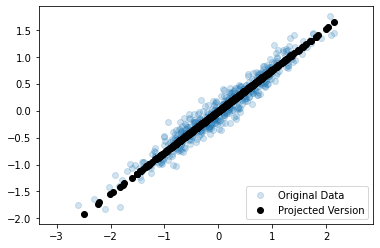

In [50]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], color ="black")
plt.legend(labels=['Original Data', 'Projected Version'], loc=4)
plt.axis('equal');

In the above figure, the light blue points indicate the original dataset. Similarly, the dark black points are the projected version of the original dataset, one dimensional.

This reduced-dimension dataset is, in some senses, "good enough" to encode the most important relationships between the points.

# PCA with Non-Linear Data

Till now, we saw classical PCA. Classical Principal Component Analysis (PCA) is good at reducing the dimensions but works linearly. If the data is not organized linearly, PCA fails to do the required job. This is where Kernel PCA comes in.



For this assignment, we will generate a nonlinear data through `make_circles` function provided by `sklearn.datasets.` The seed value for the random number generator is defined to reproduce the same set of points on each random number generator execution. 



## **Exercise 1: Generate Non Linear data samples**

**[UNGRADED]**





In [51]:
from sklearn.datasets import make_circles

## Set the seed for random number generator
np.random.seed(7)




Now that the seed is defined, let us proceed to the generation of non-linear data. Since the main aim of this assignment is to demonstrate the linear PCA and Kernel PCA on non-linear data, we need non-linear data samples.

**Task:**

- Generate $500$ data samples with `make_circles()` that is distributed in concentric circles with factor $0.2$ and noise $0.02$.




__Note__:

- `factor` is the parameter of `make_circles,` which is the scale factor between the inner and outer circle. Default value is $0.8$.

- `noise` is the parameter of `make_circles,` which is the standard deviation of Gaussian noise added to the data.

In [52]:
import sklearn
### Ex-1-Task-1

## Generate Samples
X, y = None, None

## (~ 1 line of code)
### BEGIN SOLUTION
# your code here
X, y = sklearn.datasets.make_circles(n_samples=500, factor=0.2, noise=0.02)
### END SOLUTION

In [53]:
assert X is not None, 'Invalid dataset!'
assert y is not None, 'Invalid dataset!'

In [54]:
### Intentionally Left Blank

# Visualise Non Linear Data

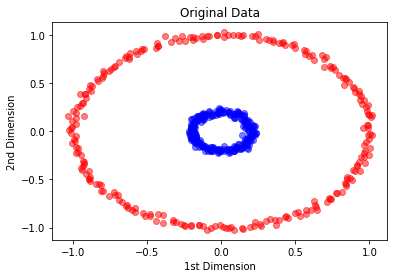

In [55]:
## Plot original non linear data
plt.title("Original Data")
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.xlabel("1st Dimension");
plt.ylabel("2nd Dimension");

This is a linearly inseparable data with two classes. In this case, classical PCA does not perform does not work well. Let us see how classical PCA fails to operate in nonlinear data.

In [56]:
## Perform classical PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [57]:
eig_vectors = pca.components_
eig_vec1 = eig_vectors[0]
eig_vec2 = eig_vectors[1]

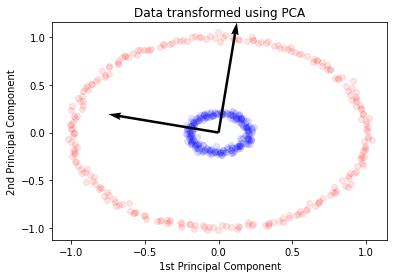

In [58]:
## Plot the projection of data
# plt.figure()
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.1)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.1)

plt.quiver(*origin, *eig_vec1, scale=3)
plt.quiver(*origin, *eig_vec2, scale=3)

plt.title("Data transformed using PCA");
plt.xlabel("1st Principal Component");
plt.ylabel("2nd Principal Component");

The principal components with classical PCA are unable to project into the direction of the highest variances. If we reduce the dimension of the data and project the original data with only the first principal component, we get the result below:

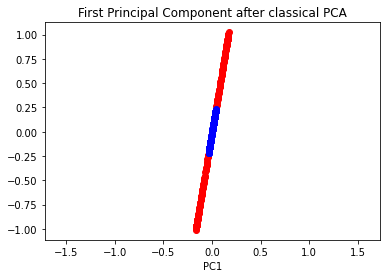

In [59]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)

plt.scatter(X_new[y==0, 0], X_new[y==0, 1], color='red')
plt.scatter(X_new[y==1, 0], X_new[y==1, 1], color='blue')
plt.title("First Principal Component after classical PCA")
plt.xlabel('PC1')
plt.axis('equal');

The results obtained via the linear PCA (classical PCA) approach does not produce a subspace where the two classes are linearly well separated.

Hence, a nonlinear technique is required if the task is to reduce the dimensionality of nonlinear data. There is a basic idea to deal with such non linearly separable dataset. That is to project it onto a higher dimensional space where it becomes linearly separable. This is popularly called _Kernel_ trick. By using kernel
functions, one can efficiently compute principal components in high
dimensional feature spaces, related to input space by some nonlinear
map. Some of the kernel functions are _polynomial_, _rbf(radial basis function)_, _sigmoid_, and others.

## **Exercise 2: Build a Kernel PCA model**  

**[Points: 5]**

Here you will build a kernel PCA model.

**Task:**

- Import Kernel PCA from sklearn

- Using Scikit-Learn's KernelPCA estimator, build a model with parameters `kernel`rbf and `gamma` $10$. Set the parameter `fit_inverse_transform` to True.

In [60]:
### Ex-2-Task-1

## Import Kernel PCA from scikit learn and build a model(~2 line of code)

kernel_pca = None

## (~ 2 line of code)
### BEGIN SOLUTION
# your code here
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(kernel='rbf', gamma=10, fit_inverse_transform=True)
### END SOLUTION

X_kernel_pca = kernel_pca.fit_transform(X)

In [61]:
assert kernel_pca is not None, 'Invalid model!'

In [62]:
### Intentionally Left Blank


Now, we will plot the kernel PCA projection of the data into higher dimension (defult is three dimensional). 

Text(0.5, 1.0, 'Data transformed using Kernel PCA')

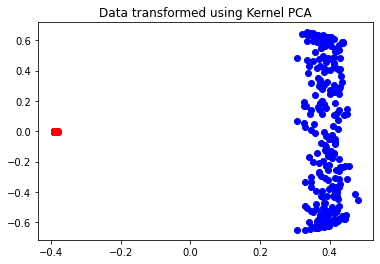

In [63]:
## Plot kernel PCA projection of the data
plt.figure()

plt.scatter(X_kernel_pca[y==0, 0], X_kernel_pca[y==0, 1], color='red')
plt.scatter(X_kernel_pca[y==1, 0], X_kernel_pca[y==1, 1], color='blue')

plt.title("Data transformed using Kernel PCA")

Using the gaussian radial basis function, we can project the data into a high dimension (three dimensions) where it becomes linearly separable. We will decrease the dimension of the dataset to one dimension with the help of the first principal component. In this case, the original dataset becomes the one that is projected to the higher dimension. So, we fit and transform into X_kernel_pca, not X!

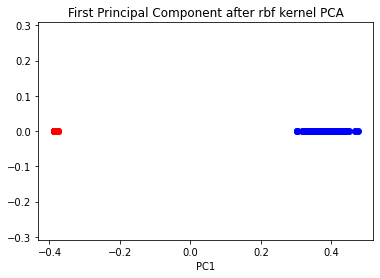

In [64]:
pca = KernelPCA(kernel = "linear", fit_inverse_transform=True,  n_components=1)
pca.fit(X_kernel_pca)
X_pca = pca.transform(X_kernel_pca)
X_new = pca.inverse_transform(X_pca)

plt.scatter(X_new[y==0, 0], X_new[y==0, 1], color='red')
plt.scatter(X_new[y==1, 0], X_new[y==1, 1], color='blue')
plt.title("First Principal Component after rbf kernel PCA")
plt.xlabel('PC1')
plt.axis('equal');

Again, this 1-dimensional subspace obtained via Gaussian RBF kernel PCA looks much better in terms of linear class separation
.

## **Exercise 3: Tranform the data back to original space**  

**[Points: 5]**

Now, let's transform data back to the original subspace (two dimension) using the kernel method to show the inverse is maintained.

**Task:**

- Perform `inverse_transform` for _kernel_pca_ with *X_kernel_pca* to regain the original data.

In [65]:
### Ex-3-Task-1

## Transform the data back to the original space

X_inverse_original = None

## (~ 1 line of code)
### BEGIN SOLUTION
# your code here
X_inverse_original = kernel_pca.inverse_transform(X_kernel_pca)
### END SOLUTION

print("transformed shape:", X_inverse_original.shape)

transformed shape: (500, 2)


In [66]:
assert X_inverse_original is not None, 'Invalid model!'

In [67]:
### Intentionally Left Blank


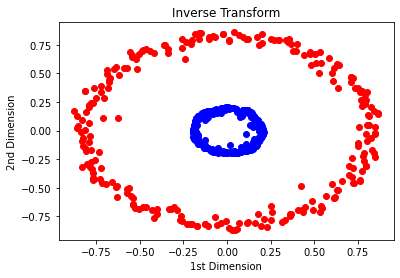

In [68]:
plt.figure()

plt.scatter(X_inverse_original[y==0, 0], X_inverse_original[y==0, 1], color='red')
plt.scatter(X_inverse_original[y==1, 0], X_inverse_original[y==1, 1], color='blue')

plt.title("Inverse Transform")
plt.xlabel("1st Dimension");
plt.ylabel("2nd Dimension");

Hence, the original data is regained with the inverse operation even if we project the data into higher dimensions with kernel trick.

# Additional Resources

- Articles
  - Kernel tricks and nonlinear dimensionality reduction via RBF kernel PCA (2014) by Sebastian Raschka.
    - https://sebastianraschka.com/Articles/2014_kernel_pca.html